# Imports e ajuste dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("database/steam.csv",encoding= 'unicode_escape')
df["rating"]=df["positive_ratings"]/(df["positive_ratings"]+df["negative_ratings"])*100
df["totalRatings"]=df["positive_ratings"]+df["negative_ratings"]
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,rating,totalRatings
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,124534.0,3339.0,17612.0,317,10000000-20000000,7.19,97.388815,127873.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,3318.0,633.0,277.0,62,5000000-10000000,3.99,83.978740,3951.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0.0,3416.0,398.0,187.0,34,5000000-10000000,3.99,89.564761,3814.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,1273.0,267.0,258.0,184,5000000-10000000,3.99,82.662338,1540.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0.0,5250.0,288.0,624.0,415,5000000-10000000,3.99,94.799567,5538.0


# Exploração inicial

### Coluna Price

Nesta célula podemos notar que o valor dos jogos tem uma diferença entre a média e a mediana relativamente grande (4 para 6 libras esterlinas) e que isso se deve a um grande número de valores outliers como podemos ver no gráfico, onde o terceiro quartil está localizado em 7.19 e o valor máximo da base para o preço é de 421 libras esterlinas. Ao pesquisar notamos que o valor do jogo ADR-Labelling Game realmente era de 421 libras, porém foi reduzido para algo em torno de 15 libras no começo desse ano. Infelizmente como temos muitos jogos acima de um valor considerado outlier

In [3]:
df.price.describe()
print("Nome do jogo mais caro:")
print(df[df["price"]==421.99].name.tolist())

Nome do jogo mais caro:
['ADR-Labelling Game']


Por definição um outlier é todo dado acima do valor do terceiro quartil + 3* o intervalo inter-quartis

In [4]:
IQR=df.price.describe()["75%"]-df.price.describe()["25%"]
outerLimit=df.price.describe()["75%"]+1.5*IQR
print("Contando Outliers:")
print(len(df[df["price"]>outerLimit]))

Contando Outliers:
1975


Gráfico do boxplot do campo price com e sem os outliers

<AxesSubplot:>

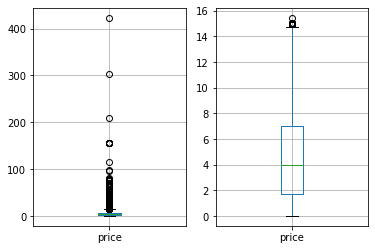

In [5]:
fig, axs = plt.subplots(ncols=2)
df.boxplot(column="price", ax=axs[0])
df[df["price"]<outerLimit].boxplot(column="price", ax=axs[1])

### Coluna Achievements

Analisando o número de achievements pode ser interessante em casos onde queremos ver por exemplo o efeito que o desenvolvedor trás pro jogo ao dar esse incentivo a mais para o jogador buscar atividades dentro do jogo.

In [6]:
print(df.achievements.describe())
print("Nome do jogo com 9821 achievements:")
print(df[df["achievements"]==9821].name.tolist())

count    27075.000000
mean        45.249271
std        352.670235
min          0.000000
25%          0.000000
50%          7.000000
75%         23.000000
max       9821.000000
Name: achievements, dtype: float64
Nome do jogo com 9821 achievements:
['LOGistICAL']


In [7]:
IQR=df.achievements.describe()["75%"]-df.achievements.describe()["25%"]
outerLimit=df.achievements.describe()["75%"]+1.5*IQR
print("Contando Outliers:")
print(len(df[df["achievements"]>outerLimit]))

Contando Outliers:
1695


<AxesSubplot:>

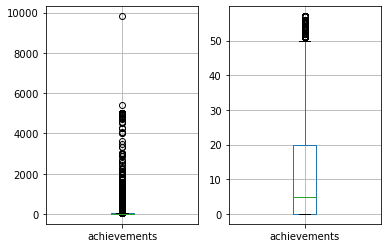

In [8]:
fig, axs = plt.subplots(ncols=2)
df.boxplot(column="achievements", ax=axs[0])
df[df["achievements"]<outerLimit].boxplot(column="achievements", ax=axs[1])

<AxesSubplot:>

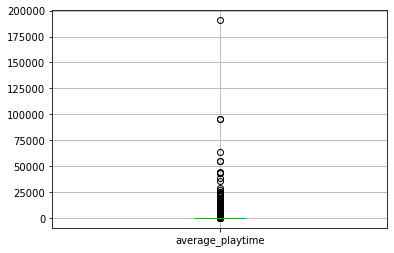

In [9]:
df.boxplot(column="average_playtime")

In [10]:
df["average_playtime"].describe()

count     27075.000000
mean        149.804949
std        1827.038141
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      190625.000000
Name: average_playtime, dtype: float64

In [11]:
df["rating"].describe()

count    27075.000000
mean        71.449639
std         23.359702
min          0.000000
25%         58.333333
50%         76.038339
75%         89.393939
max        100.000000
Name: rating, dtype: float64